## **MÔI TRƯỜNG TRIỂN KHAI ỨNG DỤNG**


In [2]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.mixture import GaussianMixture
from sklearn.manifold import TSNE

import warnings
warnings.filterwarnings('ignore')

In [3]:
# # Kết nối Google Drive
# from google.colab import drive
# drive.mount("/content/gdrive", force_remount = True)
# folder = '/content/gdrive/MyDrive/Colab Notebooks'

In [4]:
# Tập dữ liệu
# df = pd.read_csv(folder + '/marketing_campaign.csv')
df = pd.read_csv('marketing_campaign.csv',delimiter='\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


## **TIỀN XỬ LÝ DỮ LIỆU**

### Xử lý missing values

In [5]:
# Kiểm tra có dữ liệu bị thiếu hay không
df.isnull().sum().sort_values(ascending=False)

Income                 24
ID                      0
NumDealsPurchases       0
Z_Revenue               0
Z_CostContact           0
Complain                0
AcceptedCmp2            0
AcceptedCmp1            0
AcceptedCmp5            0
AcceptedCmp4            0
AcceptedCmp3            0
NumWebVisitsMonth       0
NumStorePurchases       0
NumCatalogPurchases     0
NumWebPurchases         0
MntGoldProds            0
Year_Birth              0
MntSweetProducts        0
MntFishProducts         0
MntMeatProducts         0
MntFruits               0
MntWines                0
Recency                 0
Dt_Customer             0
Teenhome                0
Kidhome                 0
Marital_Status          0
Education               0
Response                0
dtype: int64

In [6]:
#To remove the NA values
df = df.dropna()
print("The total number of data-points after removing the rows with missing values are:", len(df))

The total number of data-points after removing the rows with missing values are: 2216


### Thêm biến mới

In [7]:
df['Age'] = 2021 - df['Year_Birth']

print(df["Age"])

# Thêm cột Kids có giá trị bằng tổng giá trị cột Kidhome và Teenhome
df['Kids'] = df['Kidhome'] + df['Teenhome']
# Thêm cột Expenses có giá trị bằng tổng giá trị các cột sản phẩm
df['Expenses'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

# In ra kết quả của hai cột mới
print("Dữ liệu sau khi thêm cột 'Kids':")
print(df['Kids'])

print("\nDữ liệu sau khi thêm cột 'Expenses':")
print(df['Expenses'])

0       64
1       67
2       56
3       37
4       40
        ..
2235    54
2236    75
2237    40
2238    65
2239    67
Name: Age, Length: 2216, dtype: int64
Dữ liệu sau khi thêm cột 'Kids':
0       0
1       2
2       0
3       1
4       1
       ..
2235    1
2236    3
2237    0
2238    1
2239    2
Name: Kids, Length: 2216, dtype: int64

Dữ liệu sau khi thêm cột 'Expenses':
0       1617
1         27
2        776
3         53
4        422
        ... 
2235    1341
2236     444
2237    1241
2238     843
2239     172
Name: Expenses, Length: 2216, dtype: int64


### Làm sạch một số biến

In [8]:
# Kiểm tra cột Marital_Status
df['Marital_Status'].value_counts()

Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [9]:
# Đổi tên các giá trị trong cột
df['Marital_Status'] = df['Marital_Status'].str.replace('Married', 'In relationship')
df['Marital_Status'] = df['Marital_Status'].str.replace('Together', 'In relationship')
df['Marital_Status'] = df['Marital_Status'].str.replace('Divorced', 'Single')
df['Marital_Status'] = df['Marital_Status'].str.replace('Widow', 'Single')
df['Marital_Status'] = df['Marital_Status'].str.replace('Absurd', 'Single')
df['Marital_Status'] = df['Marital_Status'].str.replace('Alone', 'Single')
df['Marital_Status'] = df['Marital_Status'].str.replace('YOLO', 'Single')

# Mã hóa nhãn (Label Encoding)
df['Marital_Status'] = df['Marital_Status'].map({'In relationship': 1, 'Single': 0})

# Kiểm tra lại các giá trị sau khi thay đổi
df['Marital_Status'].value_counts()


Marital_Status
1    1430
0     786
Name: count, dtype: int64

In [10]:
# Kiểm tra cột Education
df['Education'].value_counts()

Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64

In [11]:
# Đổi giá trị '2n Cycle' thành 'Master'
df['Education'] = df['Education'].str.replace('2n Cycle', 'Master')

# Mã hóa nhãn (Label Encoding)
education_mapping = {
    'Graduation': 1,
    'PhD': 2,
    'Master': 3,
    'Basic': 0
}

df['Education'] = df['Education'].map(education_mapping)

# Kiểm tra lại các giá trị sau khi thay đổi
print(df['Education'].value_counts())

Education
1    1116
3     565
2     481
0      54
Name: count, dtype: int64


In [12]:
df.columns   # Kiểm tra các cột hiện có

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Kids', 'Expenses'],
      dtype='object')

In [13]:
# Loại bỏ những cột không sử dụng
df = df.drop(columns=[
       'ID', 'Year_Birth', 'Dt_Customer', 'Kidhome', 'Teenhome', 'Recency', 'NumDealsPurchases',
       'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp1',
       'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain', 'Response','Z_CostContact', 'Z_Revenue'
       ])


In [14]:
# Đổi tên lại các cột
df.columns = ['Education', 'Marital_Status', 'Income', 'Wines', 'Fruits', 'Meat', 'Fish', 'Sweet', 'Gold',  'Age', 'Children', 'Expenses']

print(df)

      Education  Marital_Status   Income  Wines  Fruits  Meat  Fish  Sweet  \
0             1               0  58138.0    635      88   546   172     88   
1             1               0  46344.0     11       1     6     2      1   
2             1               1  71613.0    426      49   127   111     21   
3             1               1  26646.0     11       4    20    10      3   
4             2               1  58293.0    173      43   118    46     27   
...         ...             ...      ...    ...     ...   ...   ...    ...   
2235          1               1  61223.0    709      43   182    42    118   
2236          2               1  64014.0    406       0    30     0      0   
2237          1               0  56981.0    908      48   217    32     12   
2238          3               1  69245.0    428      30   214    80     30   
2239          2               1  52869.0     84       3    61     2      1   

      Gold  Age  Children  Expenses  
0       88   64         0

In [15]:
df.describe() #Tạo bảng tóm tắt thống kê

,Education,Marital_Status,Income,Wines,Fruits,Meat,Fish,Sweet,Gold,Age,Children,Expenses
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,1.702617,0.645307,52247.251354,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,52.179603,0.947202,607.075361
std,0.876332,0.478528,25173.076661,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,11.985554,0.749062,602.900476
min,0.000000,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,0.000000,5.000000
25%,1.000000,0.000000,35303.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,44.000000,0.000000,69.000000
50%,1.000000,1.000000,51381.500000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,51.000000,1.000000,396.500000
75%,3.000000,1.000000,68522.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,62.000000,1.000000,1048.000000
max,3.000000,1.000000,666666.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,128.000000,3.000000,2525.000000


### Xử lý outliers

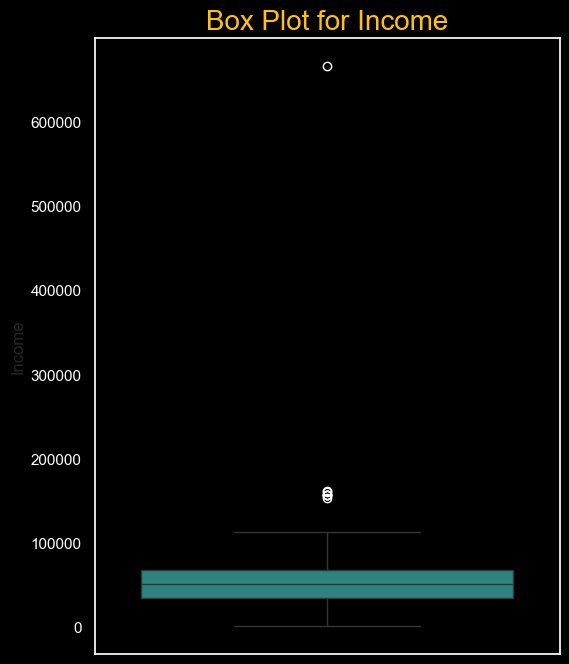

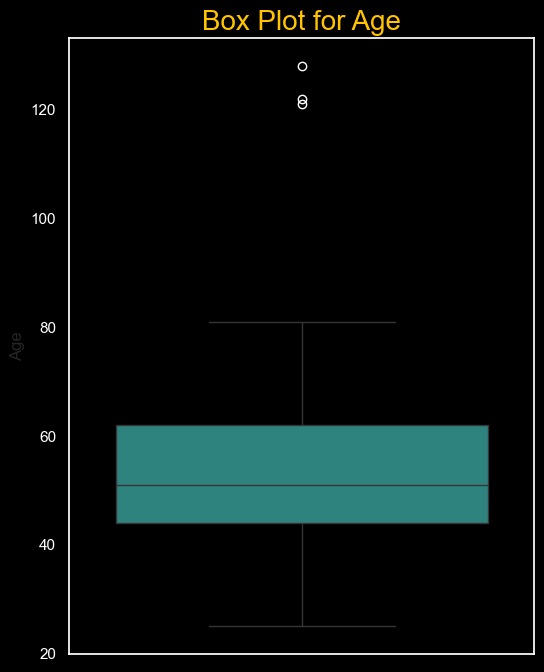

In [16]:
#Vẽ biểu đồ hộp (box plot) cho biến 'Income' từ dữ liệu df
sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'black', 'axes.grid' : False})
fig = plt.figure(figsize=(6, 8))
sns.boxplot(data=df['Income'], palette='viridis', flierprops={'markeredgecolor': 'white'})
plt.title('Box Plot for Income', color='#FFC300', size= 20)
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')
plt.show()


#Vẽ biểu đồ hộp (box plot) cho biến 'Income' từ dữ liệu df
sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'black', 'axes.grid' : False})
fig = plt.figure(figsize=(6, 8))
sns.boxplot(data=df['Age'], palette='viridis', flierprops={'markeredgecolor': 'white'})
plt.title('Box Plot for Age', color='#FFC300', size= 20)
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')
plt.show()

In [17]:
from scipy import stats
import numpy as np

# Tạo một DataFrame mới chỉ chứa các cột cần xét
df_subset = df[['Income', 'Age']]

# Tính toán z-scores cho từng cột trong df_subset
z_scores = np.abs(stats.zscore(df_subset))

# Lọc các hàng có giá trị z-score nằm trong khoảng [-3, 3] cho cả hai cột
filtered_entries = (z_scores < 3).all(axis=1)

# Tạo một DataFrame mới với các hàng đã lọc
df1 = df[filtered_entries]
df1.reset_index(inplace=True, drop=True)

len(df1)



2205

In [18]:
from sklearn.preprocessing import MinMaxScaler

# Tạo một scaler
scaler = MinMaxScaler()

# Scale dữ liệu về khoảng 0-1
df1_scaled = scaler.fit_transform(df1)

# Chuyển đổi dữ liệu scaled thành DataFrame
df1_scaled = pd.DataFrame(df1_scaled, columns=df1.columns)

# Kiểm tra kết quả
df1_scaled.head()

,Education,Marital_Status,Income,Wines,Fruits,Meat,Fish,Sweet,Gold,Age,Children,Expenses
0,0.333333,0.0,0.503625,0.425318,0.442211,0.316522,0.664093,0.335878,0.274143,0.696429,0.000000,0.639683
1,0.333333,0.0,0.398325,0.007368,0.005025,0.003478,0.007722,0.003817,0.018692,0.750000,0.666667,0.008730
2,0.333333,1.0,0.623933,0.285332,0.246231,0.073623,0.428571,0.080153,0.130841,0.553571,0.000000,0.305952
3,0.333333,1.0,0.222456,0.007368,0.020101,0.011594,0.038610,0.011450,0.015576,0.214286,0.333333,0.019048
4,0.666667,1.0,0.505009,0.115874,0.216080,0.068406,0.177606,0.103053,0.046729,0.267857,0.333333,0.165476


# **MÔ HÌNH PHÂN CỤM**

##Elbow

### K-Means Clustering

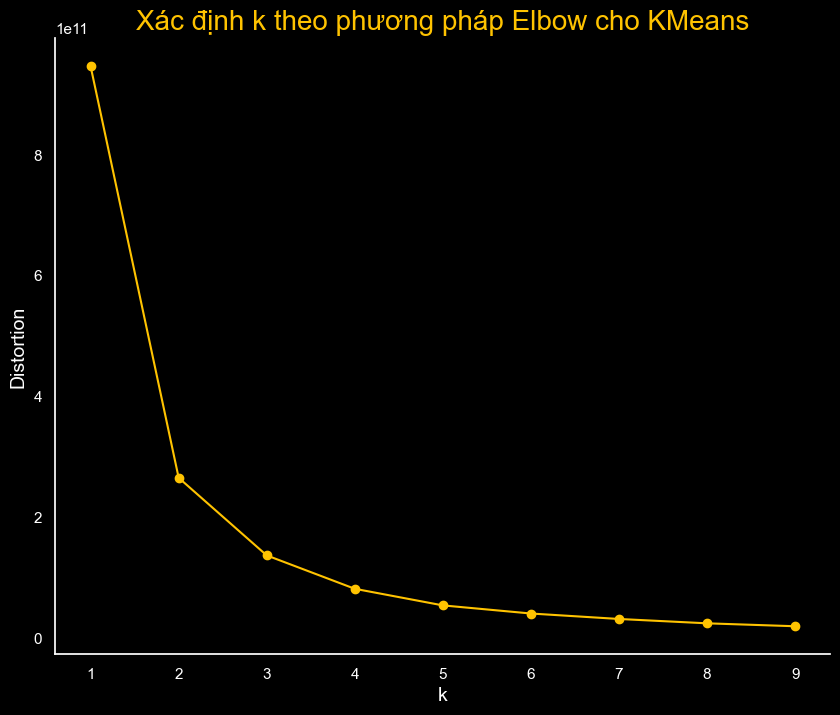

In [19]:
# Elbow method for KMeans
K = range(1, 10)
cost_kmeans = []
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df1)
    cost_kmeans.append(kmeans.inertia_)

# Plotting the elbow for KMeans
sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'black', 'axes.grid': False})

fig, ax = plt.subplots(figsize=(10, 8))
plt.plot(K, cost_kmeans, 'bo-', color='#FFC300')
plt.xlabel('k', color='white', size=14)
plt.ylabel('Distortion', color='white', size=14)
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')
plt.title('Xác định k theo phương pháp Elbow cho KMeans', color='#FFC300', size=20)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

### Hierarchical Clustering

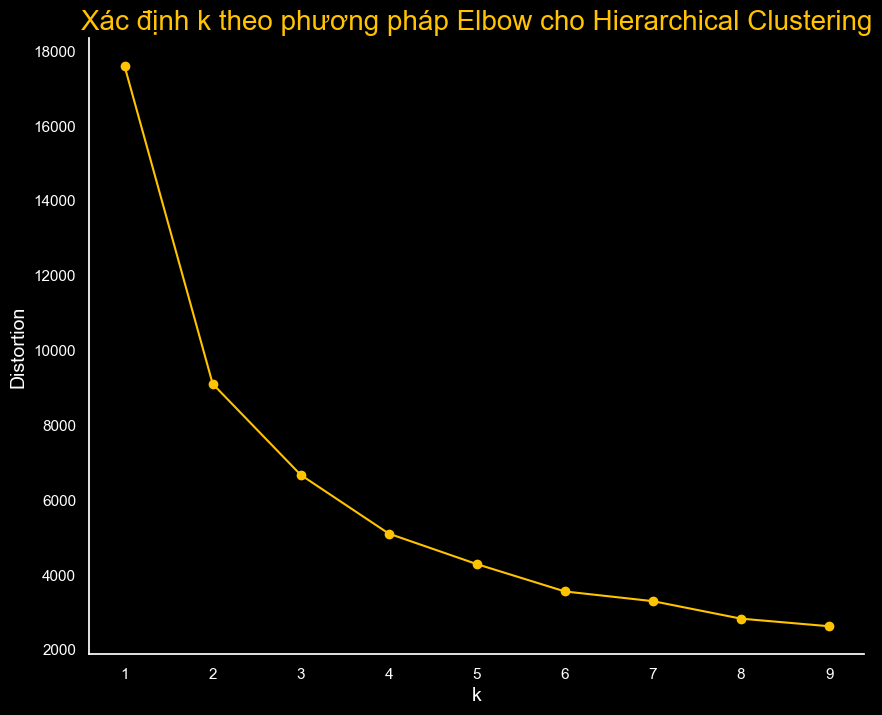

In [20]:
from scipy.spatial.distance import cdist
# Elbow method for Hierarchical Clustering
linkage_matrix = linkage(df1, method='ward')
cost_hierarchical = []
for k in K:
    clusters = fcluster(linkage_matrix, k, criterion='maxclust')
    cluster_centers = np.array([df1[clusters == i].mean(axis=0) for i in range(1, k+1)])
    cost_hierarchical.append(np.sum(np.min(cdist(df1, cluster_centers, 'euclidean'), axis=1)) / df1.shape[0])

# Plotting the elbow for Hierarchical Clustering
fig, ax = plt.subplots(figsize=(10, 8))
plt.plot(K, cost_hierarchical, 'bo-', color='#FFC300')
plt.xlabel('k', color='white', size=14)
plt.ylabel('Distortion', color='white', size=14)
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')
plt.title('Xác định k theo phương pháp Elbow cho Hierarchical Clustering', color='#FFC300', size=20)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

### GMM Clustering

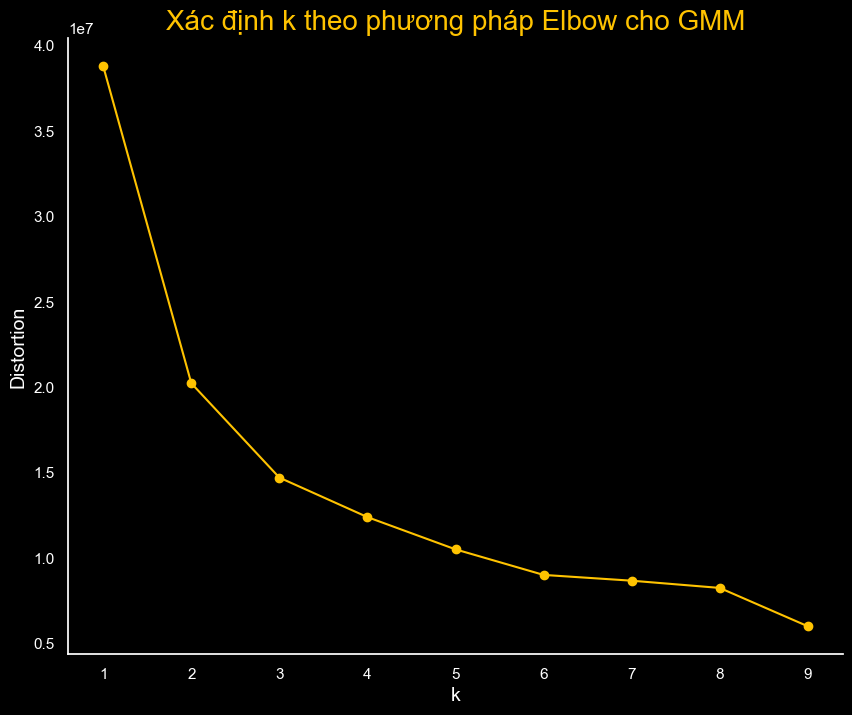

In [21]:
# Elbow method for GMM using WCSS
cost_gmm = []
for k in K:
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm.fit(df1)
    labels = gmm.predict(df1)
    wcss = np.sum(np.min(cdist(df1, gmm.means_, 'euclidean'), axis=1))
    cost_gmm.append(wcss)

# Plotting the elbow for GMM
fig, ax = plt.subplots(figsize=(10, 8))
plt.plot(K, cost_gmm, 'bo-', color='#FFC300')
plt.xlabel('k', color='white', size=14)
plt.ylabel('Distortion', color='white', size=14)
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')
plt.title('Xác định k theo phương pháp Elbow cho GMM', color='#FFC300', size=20)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

##Silhouette score

### K-Means Clustering

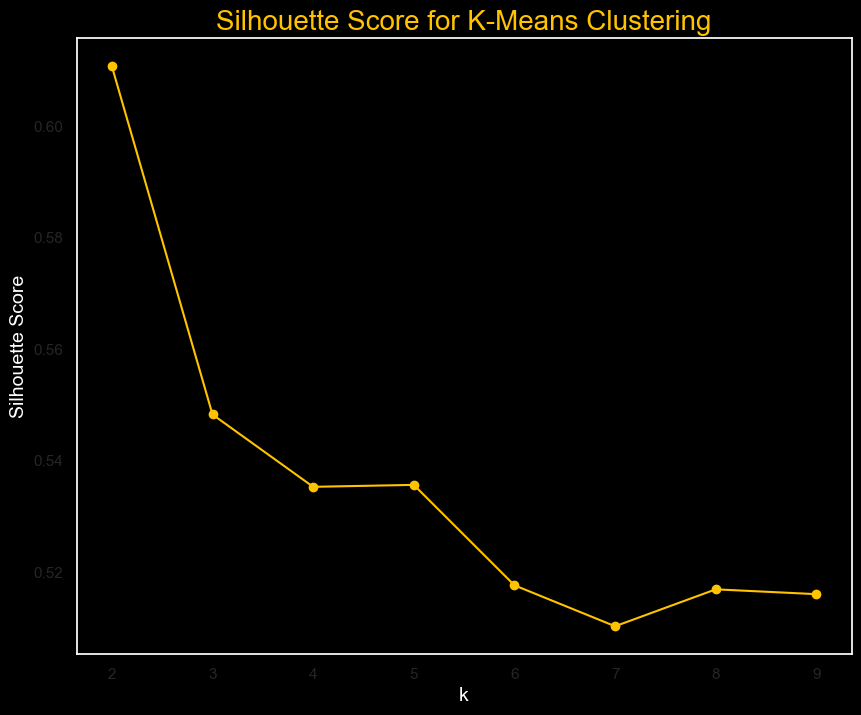

In [22]:
def silhouette_score_kmeans(df, labels):
    return silhouette_score(df, labels)

silhouette_scores_kmeans = []

# Lặp qua các số lượng cụm từ 2 đến 10 cho K-Means
K = range(2, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(df1)
    silhouette_avg = silhouette_score_kmeans(df1, clusters)
    silhouette_scores_kmeans.append(silhouette_avg)


# Visualize Silhouette Scores for K-Means

plt.figure(figsize=(10, 8))
plt.plot(K, silhouette_scores_kmeans, 'bo-', color='#FFC300')
plt.xlabel('k', color='white', size=14)
plt.ylabel('Silhouette Score', color='white', size=14)
plt.title('Silhouette Score for K-Means Clustering', color='#FFC300', size=20)
plt.show()


### Hierarchical Clustering

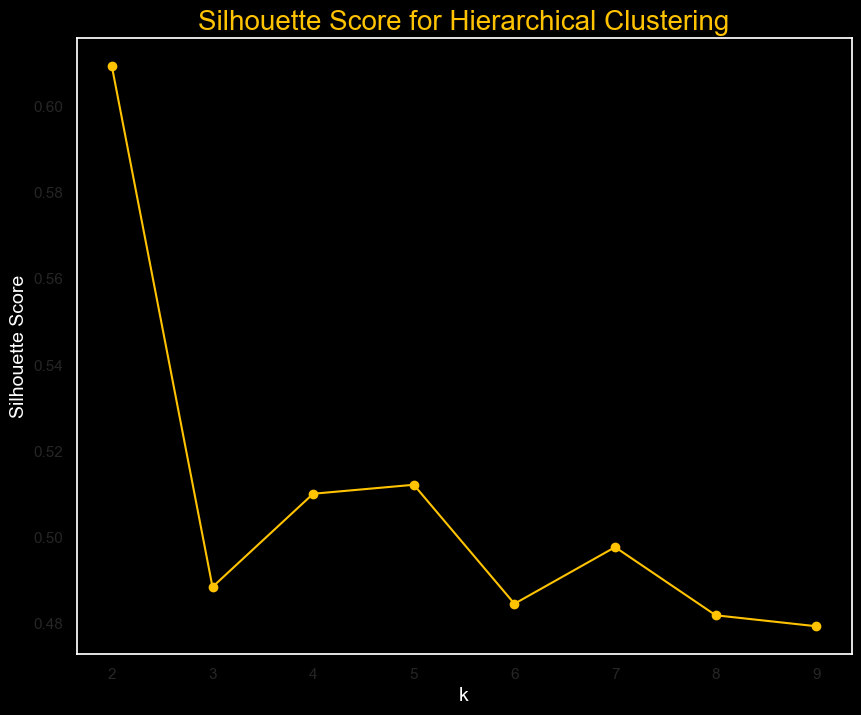

In [23]:
silhouette_scores_hierarchical = []

for k in K:
    hierarchical = linkage(df1, method='ward')
    clusters = fcluster(hierarchical, k, criterion='maxclust')
    silhouette_avg = silhouette_score(df1, clusters)
    silhouette_scores_hierarchical.append(silhouette_avg)


plt.figure(figsize=(10, 8))
plt.plot(K, silhouette_scores_hierarchical, 'bo-', color='#FFC300')
plt.xlabel('k', color='white', size=14)
plt.ylabel('Silhouette Score', color='white', size=14)
plt.title('Silhouette Score for Hierarchical Clustering', color='#FFC300', size=20)
plt.show()


### GMM Clustering

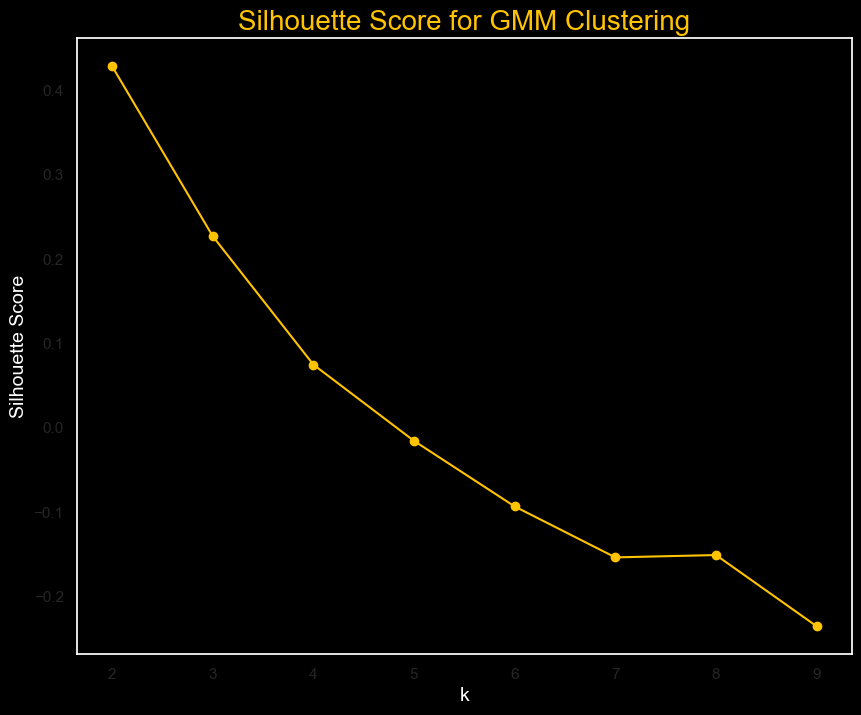

In [24]:
silhouette_scores_gmm = []

for k in K:
    gmm = GaussianMixture(n_components=k, random_state=42)
    clusters = gmm.fit_predict(df1)
    silhouette_avg = silhouette_score(df1, clusters)
    silhouette_scores_gmm.append(silhouette_avg)


plt.figure(figsize=(10, 8))
plt.plot(K, silhouette_scores_gmm, 'bo-', color='#FFC300')
plt.xlabel('k', color='white', size=14)
plt.ylabel('Silhouette Score', color='white', size=14)
plt.title('Silhouette Score for GMM Clustering', color='#FFC300', size=20)
plt.show()


##Trực quan hóa các cụm

K-Means Scores: Silhouette=0.5353, Davies-Bouldin=0.5498, Calinski-Harabasz=7821.2247
Hierarchical Scores: Silhouette=0.5101, Davies-Bouldin=0.5504, Calinski-Harabasz=7064.1240
GMM Scores: Silhouette=0.0748, Davies-Bouldin=1.7909, Calinski-Harabasz=1228.0527


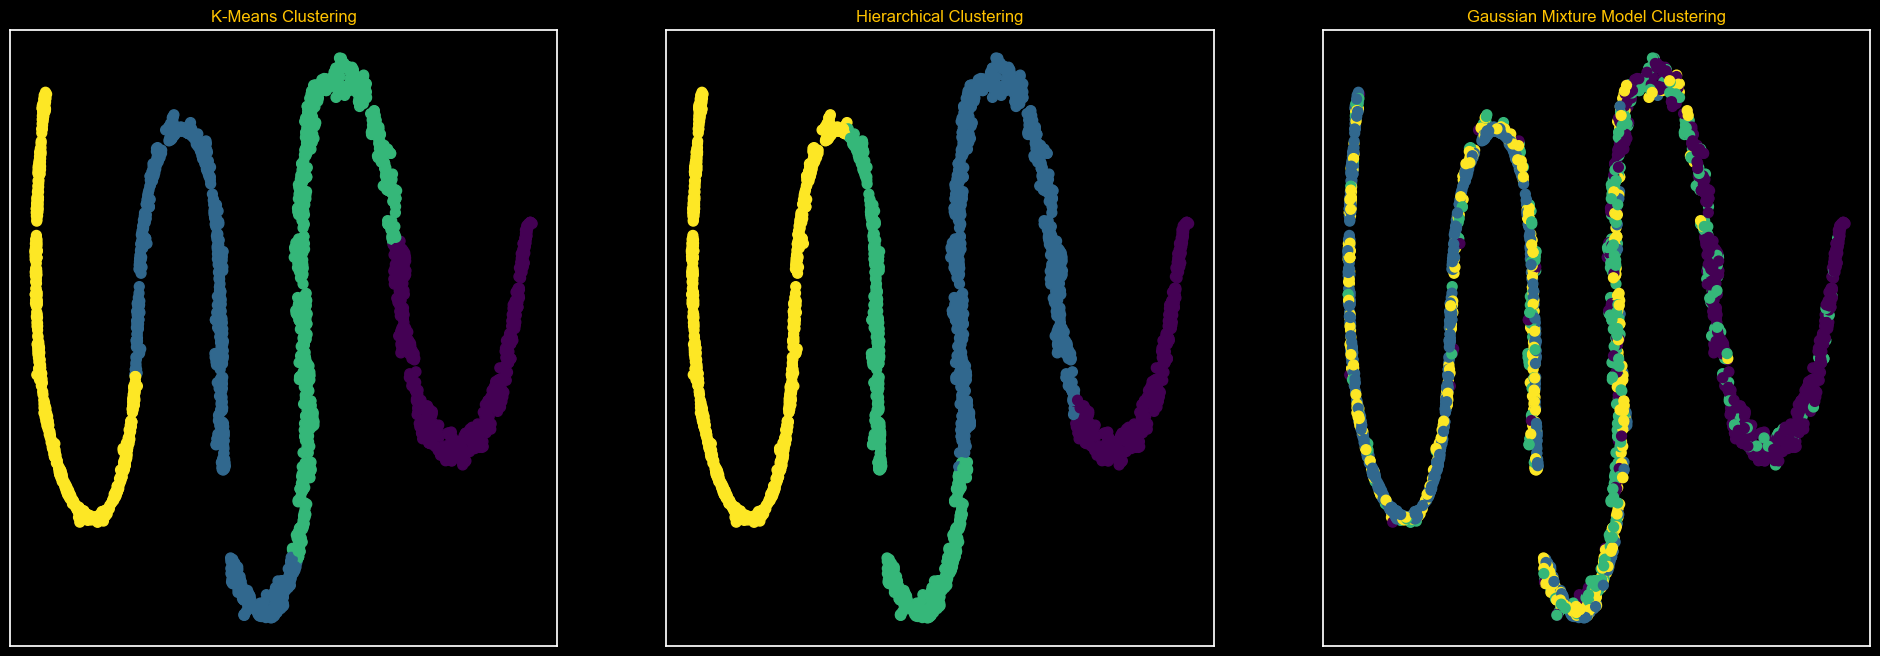

In [25]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_clusters = kmeans.fit_predict(df1)

# Hierarchical Clustering
hierarchical = linkage(df1, method='ward')
hierarchical_clusters = fcluster(hierarchical, 4, criterion='maxclust')

# GMM Clustering
gmm = GaussianMixture(n_components=4, random_state=42)
gmm_clusters = gmm.fit_predict(df1)

# Calculate evaluation metrics
def evaluate_clustering(labels, data):
    silhouette = silhouette_score(data, labels)
    davies_bouldin = davies_bouldin_score(data, labels)
    calinski_harabasz = calinski_harabasz_score(data, labels)
    return silhouette, davies_bouldin, calinski_harabasz

kmeans_scores = evaluate_clustering(kmeans_clusters, df1)
hierarchical_scores = evaluate_clustering(hierarchical_clusters, df1)
gmm_scores = evaluate_clustering(gmm_clusters, df1)

# Print evaluation results
print(f'K-Means Scores: Silhouette={kmeans_scores[0]:.4f}, Davies-Bouldin={kmeans_scores[1]:.4f}, Calinski-Harabasz={kmeans_scores[2]:.4f}')
print(f'Hierarchical Scores: Silhouette={hierarchical_scores[0]:.4f}, Davies-Bouldin={hierarchical_scores[1]:.4f}, Calinski-Harabasz={hierarchical_scores[2]:.4f}')
print(f'GMM Scores: Silhouette={gmm_scores[0]:.4f}, Davies-Bouldin={gmm_scores[1]:.4f}, Calinski-Harabasz={gmm_scores[2]:.4f}')

# Visualize Clustering Results with t-SNE
tsne = TSNE(n_components=2, perplexity=30, learning_rate=100, n_iter=5000, random_state=42)
tsne_result = tsne.fit_transform(df1)

df_tsne = pd.DataFrame(tsne_result, columns=['t-SNE1', 't-SNE2'])
df_tsne['KMeans'] = kmeans_clusters
df_tsne['Hierarchical'] = hierarchical_clusters
df_tsne['GMM'] = gmm_clusters

fig, axes = plt.subplots(1, 3, figsize=(24, 8))

axes[0].scatter(df_tsne['t-SNE1'], df_tsne['t-SNE2'], c=df_tsne['KMeans'], cmap='viridis', s=50)
axes[0].set_title('K-Means Clustering', color='#FFC300')
axes[1].scatter(df_tsne['t-SNE1'], df_tsne['t-SNE2'], c=df_tsne['Hierarchical'], cmap='viridis', s=50)
axes[1].set_title('Hierarchical Clustering', color='#FFC300')
axes[2].scatter(df_tsne['t-SNE1'], df_tsne['t-SNE2'], c=df_tsne['GMM'], cmap='viridis', s=50)
axes[2].set_title('Gaussian Mixture Model Clustering', color='#FFC300')

for ax in axes:
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()

In [26]:
!pip install umap-learn

##Gộp dữ liệu gốc với các cụm


In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# KMeans Clustering với k tối ưu là 4
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(df1)
clusters = kmeans.fit_predict(df1)

# Gộp dữ liệu gốc với các cụm
df_clusters = pd.concat([df1, pd.DataFrame({'cluster': clusters})], axis=1)

df_clusters


,Education,Marital_Status,Income,Wines,Fruits,Meat,Fish,Sweet,Gold,Age,Children,Expenses,cluster
0,1,0,58138.0,635,88,546,172,88,88,64,0,1617,2
1,1,0,46344.0,11,1,6,2,1,6,67,2,27,1
2,1,1,71613.0,426,49,127,111,21,42,56,0,776,0
3,1,1,26646.0,11,4,20,10,3,5,37,1,53,3
4,2,1,58293.0,173,43,118,46,27,15,40,1,422,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,1,1,61223.0,709,43,182,42,118,247,54,1,1341,2
2201,2,1,64014.0,406,0,30,0,0,8,75,3,444,2
2202,1,0,56981.0,908,48,217,32,12,24,40,0,1241,2
2203,3,1,69245.0,428,30,214,80,30,61,65,1,843,2


##Phân tích ý nghĩa cụm

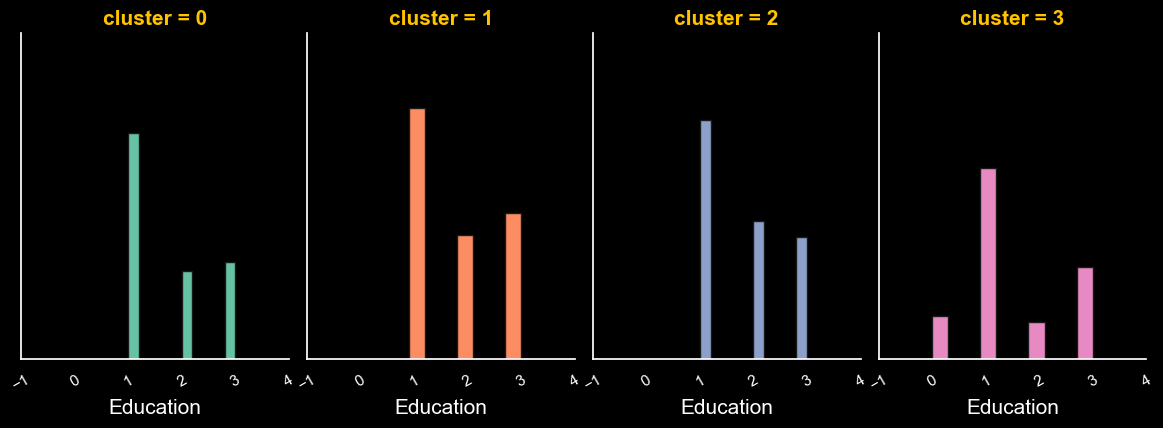

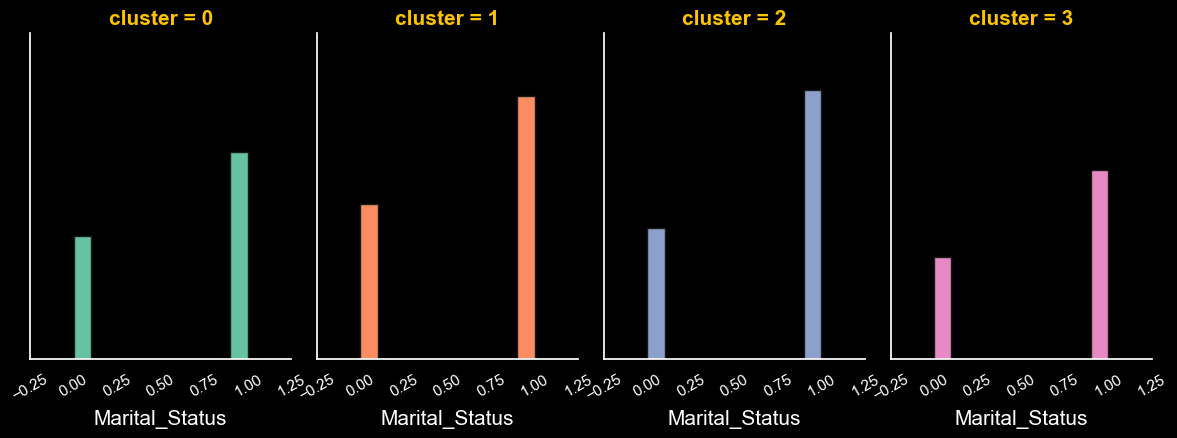

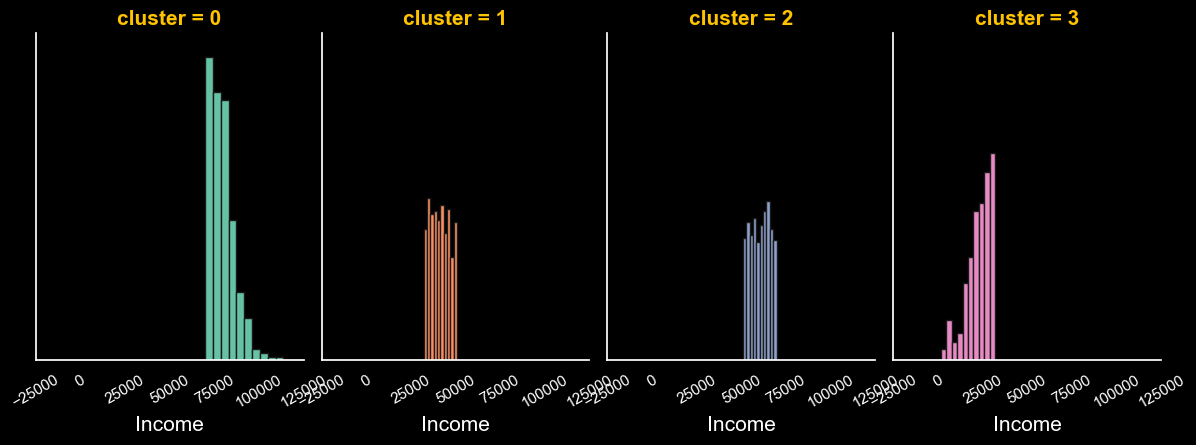

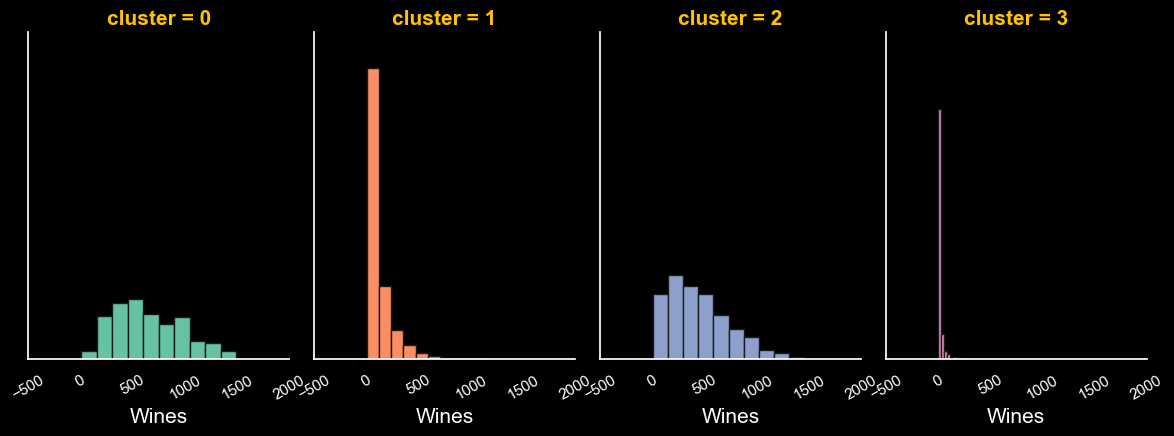

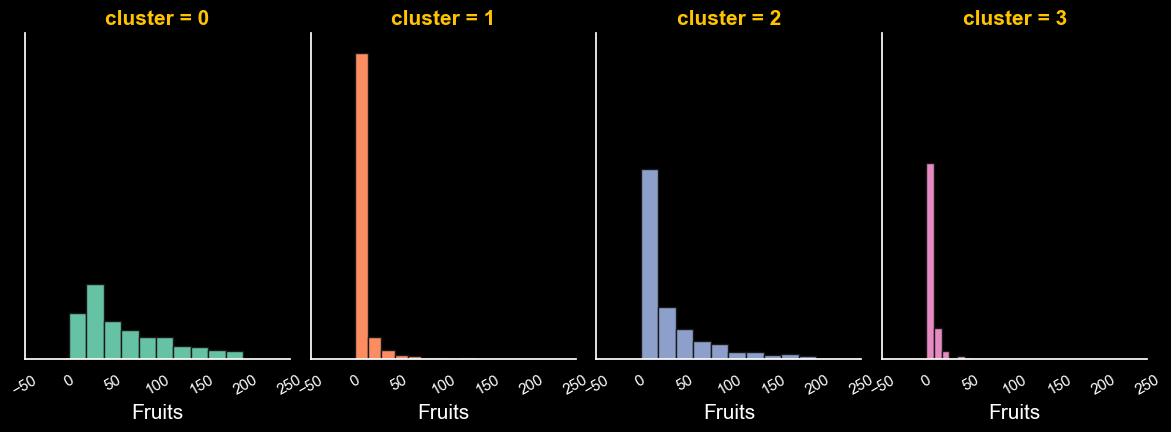

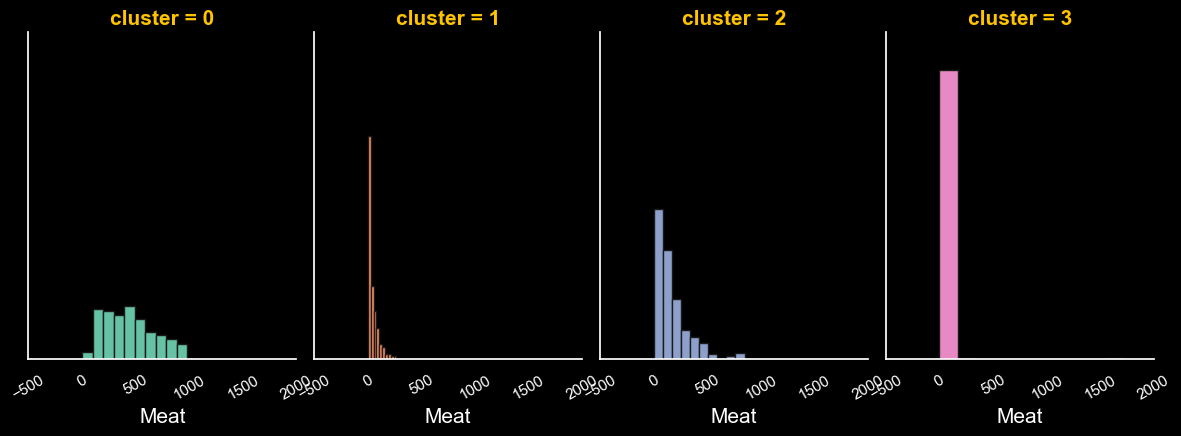

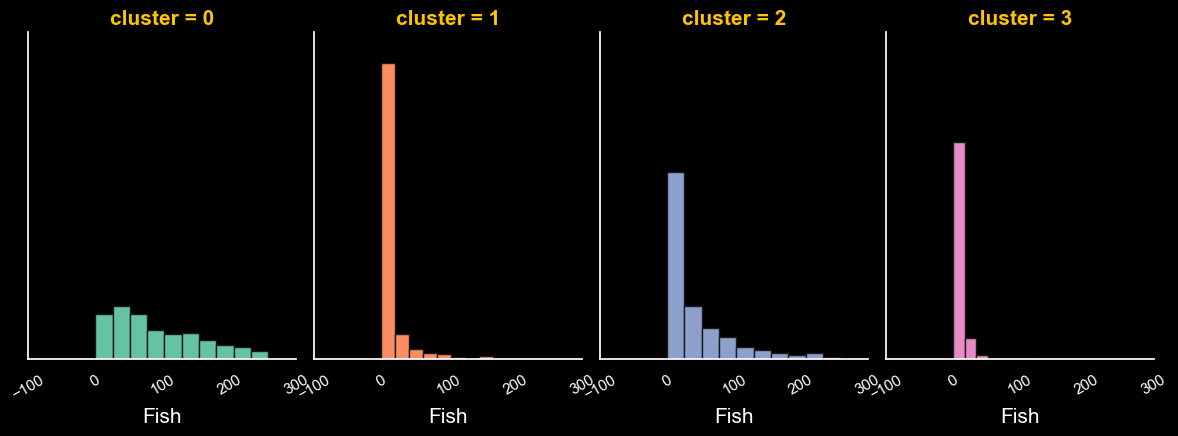

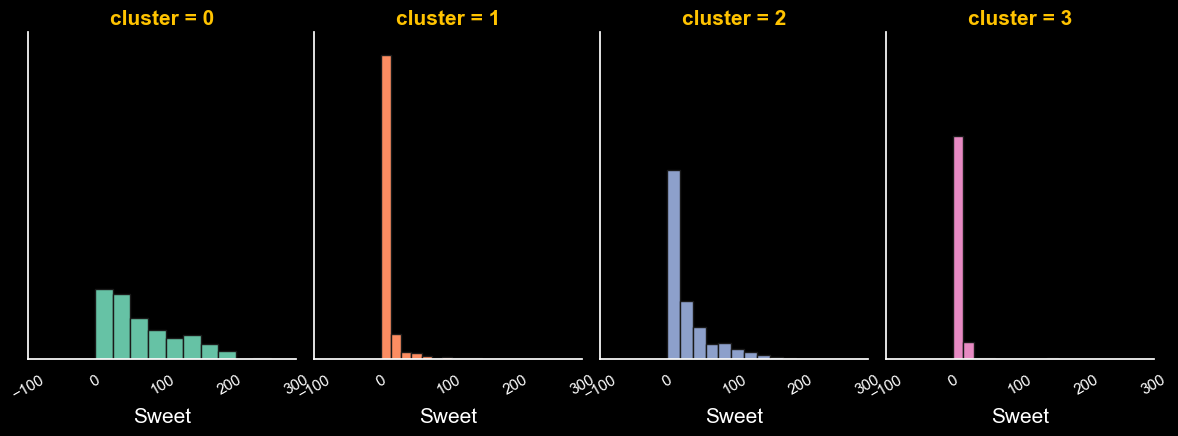

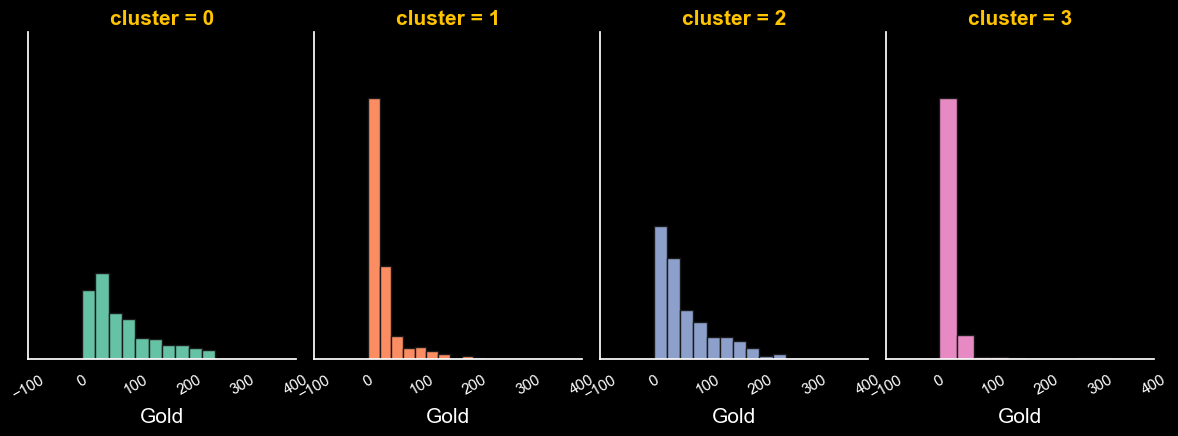

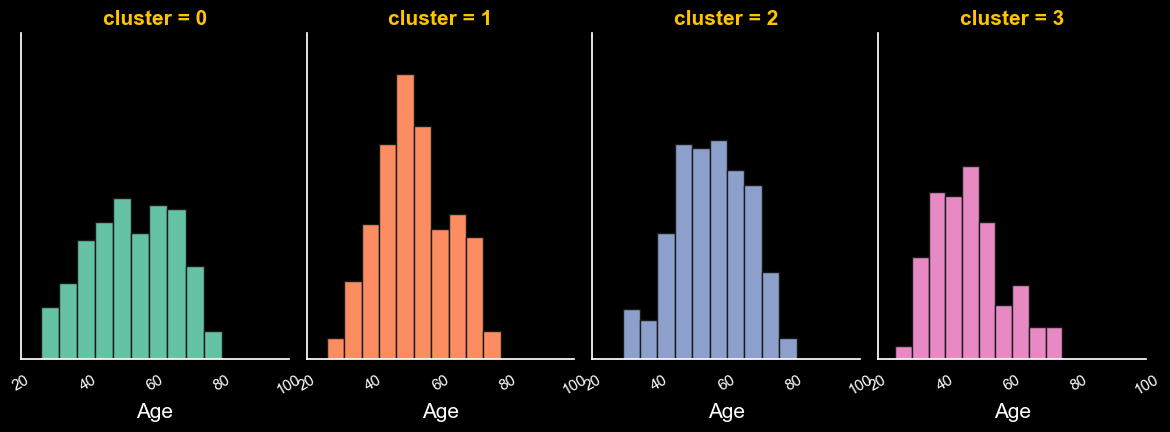

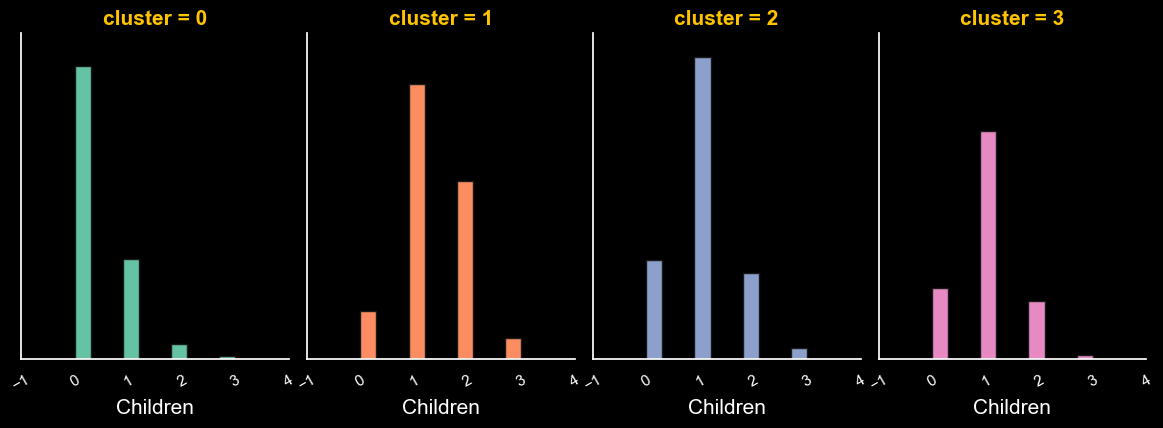

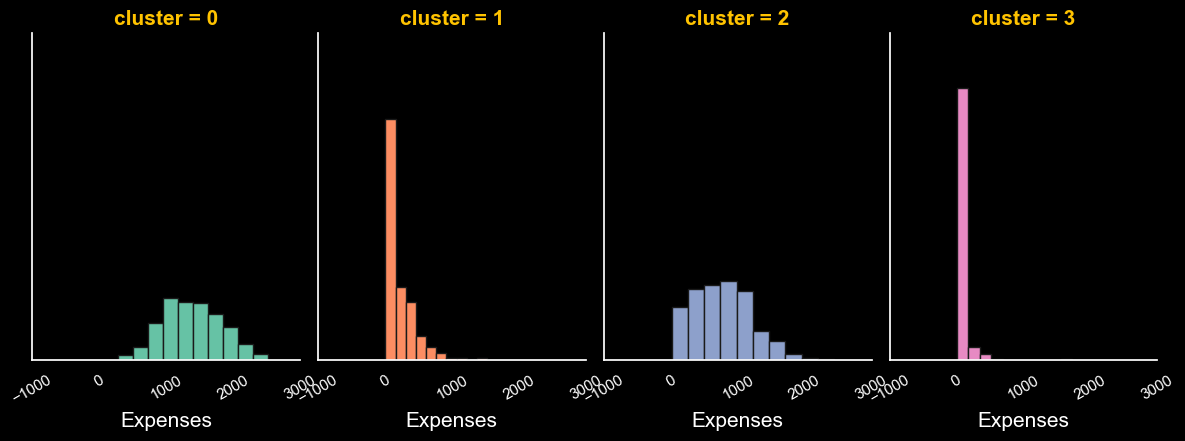

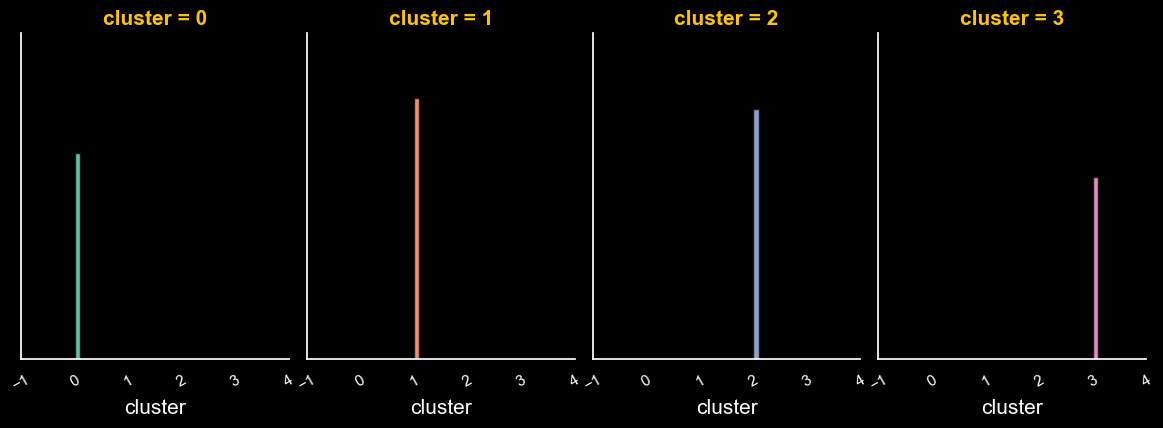

In [28]:
# Giải thích các cụm
sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'black', 'axes.grid' : False})

for col in df_clusters:
    g = sns.FacetGrid(df_clusters, col='cluster', hue='cluster', palette='Set2')
    g.map(plt.hist, col, bins=10, ec='k')
    g.set_xticklabels(rotation=30, color='white')
    g.set_yticklabels(color='white')
    g.set_xlabels(size=15, color='white')
    g.set_titles(size=15, color='#FFC300', fontweight='bold')
    g.fig.set_figheight(5)
    plt.show()

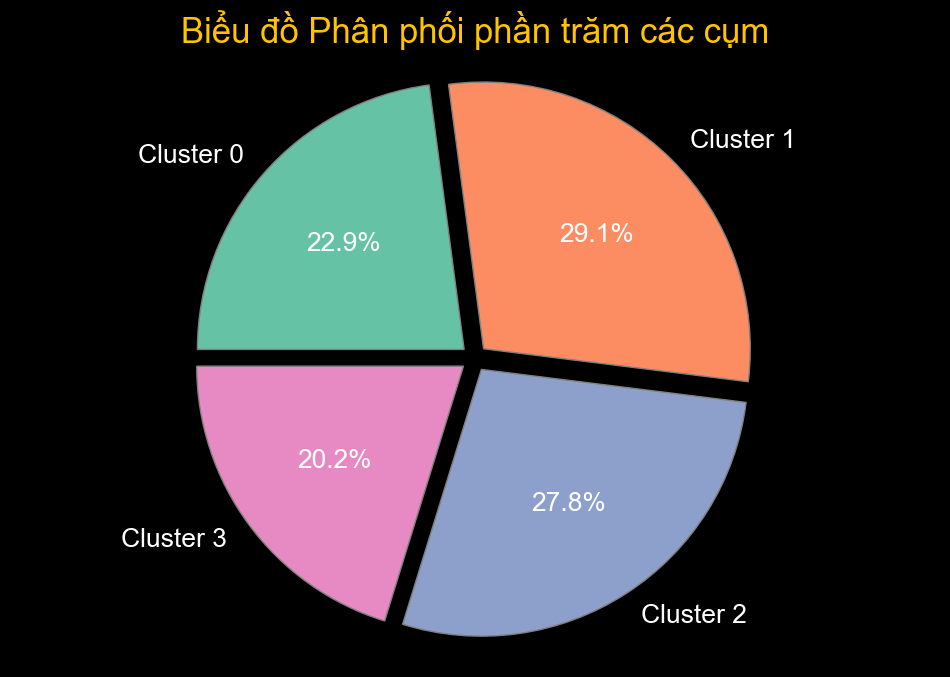

In [29]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_clusters is your dataframe with cluster assignments
# Calculate the number of samples in each cluster and store in the variable clusters_count
clusters_count = df_clusters['cluster'].value_counts()

# Convert Series clusters_count to DataFrame and reset index
clusters_count = clusters_count.to_frame().reset_index()

clusters_count.columns = ['clusters', 'count']  # Rename columns
clusters_count = clusters_count.sort_values('clusters', ascending=True)  # Sort data in ascending order

# Define labels for clusters
labels = [f"Cluster {i}" for i in clusters_count['clusters']]

# Visualization
plt.figure(figsize=(12, 8))
mpl.rcParams['font.size'] = 17
colors = sns.color_palette('Set2')[0:len(clusters_count)]

plt.pie(clusters_count['count'],
        explode=[0.05] * len(clusters_count),
        labels=labels,
        colors=colors,
        autopct='%1.1f%%',
        textprops=dict(color="white", fontsize=19),
        counterclock=False,
        startangle=180,
        wedgeprops={"edgecolor": "gray", 'linewidth': 1}
        )
plt.axis('equal')

plt.title("Biểu đồ Phân phối phần trăm các cụm", size=25, color="#FFC300")
plt.show()


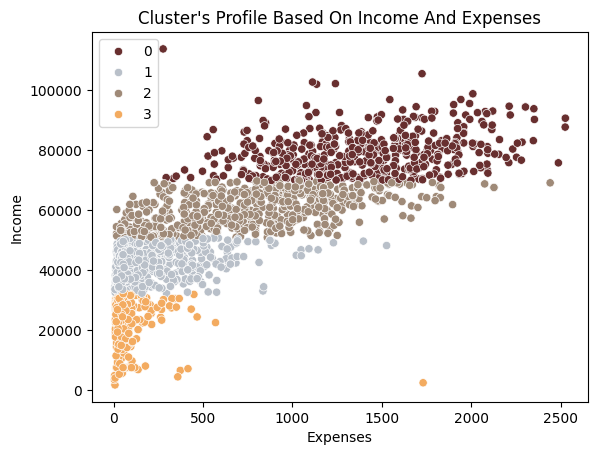

In [30]:
plt.style.use('default')
#Plotting countplot of clusters
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.scatterplot(data = df_clusters,x=df_clusters["Expenses"], y=df_clusters["Income"],hue=df_clusters["cluster"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Expenses")
plt.legend()
plt.show()

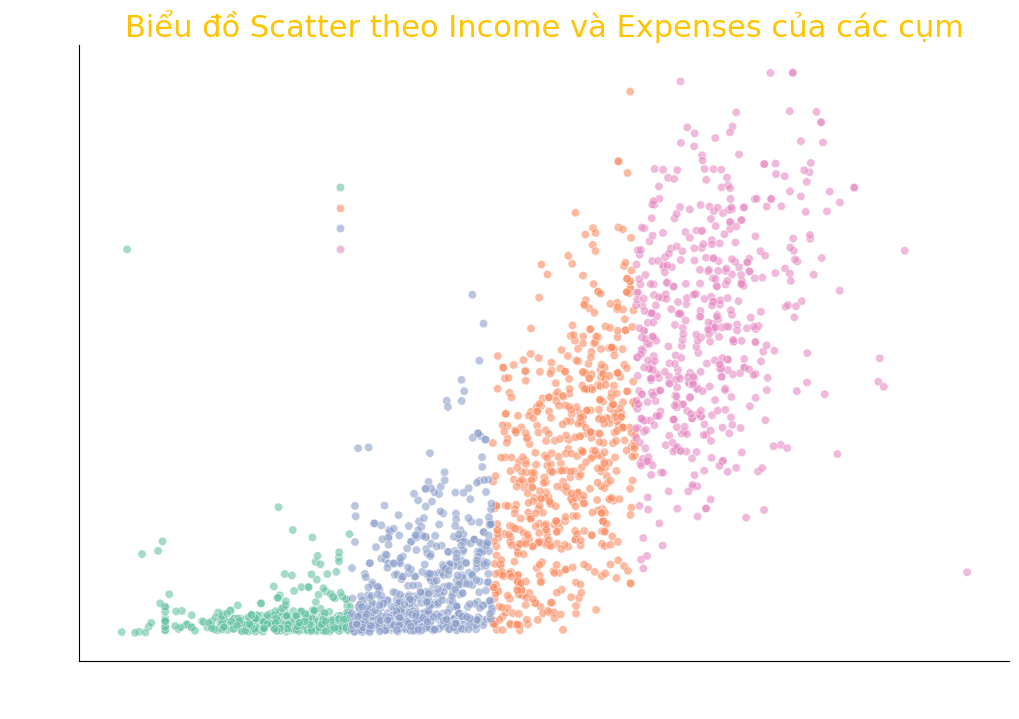

In [31]:
# Tạo một bộ dữ liệu mới từ các cột đã chọn trong DataFrame df_clusters
clusters_incomes = df_clusters[['Income', 'Expenses', 'cluster']]           # Chọn các giá trị

# Thêm một biến mới 'group' và gán giá trị từ cột 'cluster'
clusters_incomes['group'] = clusters_incomes['cluster']

# Thay đổi kiểu dữ liệu
clusters_incomes['group'] = clusters_incomes['group'].astype(str)


clusters_incomes = clusters_incomes.sort_values('group', ascending = False)    # sắp xếp dữ liệu

# Trực quan hóa
fig, ax = plt.subplots(figsize =(12, 8))

sns.scatterplot(data = clusters_incomes, x = 'Income', y = 'Expenses', hue = 'group', palette = 'Set2', alpha=0.6)

# Đặt tên cho nhãn các trục
plt.xlabel('Income', color = 'white', size = 14);
plt.ylabel('Expenses', color = 'white', size = 14);

# Ẩn các đường viền bên phải và trên cùng
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.tick_params(colors='white')
plt.legend(labelcolor = 'white', frameon=False, bbox_to_anchor=(0.33, 0.8))

# Tiêu đề
plt.title( "Biểu đồ Scatter theo Income và Expenses của các cụm", size=22, color="#FFC300")

plt.show()



In [32]:
import pandas as pd
import plotly.express as px

# Tạo một bộ dữ liệu mới
clusters_products = df_clusters[['Wines', 'Fruits', 'Meat', 'Fish', 'Sweet', 'Gold', 'cluster']]    # Chọn các biến

clusters_products1 = clusters_products.groupby(['cluster'])
clusters_products2 = clusters_products1.agg({'Wines': 'sum', 'Fruits': 'sum', 'Meat': 'sum', 'Fish': 'sum', 'Sweet': 'sum', 'Gold': 'sum'})

clusters_products3 = clusters_products2.stack().reset_index(name='Count').rename(columns={'level_1': 'Products'})   # phân rã dữ liệu

clusters_products3['group'] = clusters_products3['cluster']
clusters_products3['group'] = clusters_products3['group'].astype(str)


products = clusters_products3.copy()
products = products.assign(ratio=products.groupby('group').Count.transform(lambda x: x / x.sum()))

# Trực quan hóa
fig = px.bar(products, x='group', y='ratio', color='Products',
             labels={
                 "ratio": "Ratio",
                 "group": "Consumer's type"
             },
             color_discrete_map={
                 'Gold': '#FFD700',
                 'Fish': '#87CEEB',
                 'Wines': '#b11226',
                 'Meat': '#f08080',
                 'Sweet': '#FF69B4',
                 'Fruits': 'lightgreen'
             },
             title="Phân bổ các loại sản phẩm theo cụm")

fig.layout.yaxis.tickformat = ',.0%'
fig.update_traces(marker_line_color='white', marker_line_width=1, opacity=0.8)
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.update_layout(
    {'plot_bgcolor': 'black',
     'paper_bgcolor': 'black'
     },
    font=dict(
        family="verdana",
        size=21,
        color="white"
    ),
    width=680,
    height=800,
    title_font_color="#FFC300",
    yaxis_title=None,
    xaxis_title=None
)

fig.show()


In [35]:
import joblib
joblib.dump(kmeans , 'model.joblib')
joblib.dump(scaler, 'scaler.joblib')

['scaler.joblib']